In [1]:
import xarray as xr

In [2]:
ds = xr.open_mfdataset("/home/scratch/ahaberlie/AFWA_HAIL/HIST/*/HAIL_MAX2D_historical_*.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:     (Time: 131007, south_north: 899, west_east: 1399)
Coordinates:
  * Time        (Time) datetime64[ns] 1990-10-01 ... 2005-09-30
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (Time, south_north, west_east) float32 dask.array<chunksize=(24, 899, 1399), meta=np.ndarray>
Attributes: (12/93)
    TITLE:                            OUTPUT FROM WRF V4.1.2 MODEL
    START_DATE:                      1990-10-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        1400
    SOUTH-NORTH_GRID_DIMENSION:      900
    BOTTOM-TOP_GRID_DIMENSION:       51
    DX:                              3750.0
    ...                              ...
    file_count:                      24
    first_file:                      /gpfs/csfs1/univ/unid0001/historical/199...
    last_file:                       /gpfs/csfs1/univ/unid0001/historical/199...
    first_time:                      1990-10-01T00:00:00.000000000
    last_time:                       1990-10-01T23:00:00.000000000
    sim:                             historical

In [4]:
ds_convective = ds.sel(Time=slice('1990-10-01 12:00:00', '2005-09-30 00:00:00'))

ds_convective

<xarray.Dataset>
Dimensions:     (Time: 130995, south_north: 899, west_east: 1399)
Coordinates:
  * Time        (Time) datetime64[ns] 1990-10-01T12:00:00 ... 2005-09-30
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (Time, south_north, west_east) float32 dask.array<chunksize=(12, 899, 1399), meta=np.ndarray>
Attributes: (12/93)
    TITLE:                            OUTPUT FROM WRF V4.1.2 MODEL
    START_DATE:                      1990-10-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        1400
    SOUTH-NORTH_GRID_DIMENSION:      900
    BOTTOM-TOP_GRID_DIMENSION:       51
    DX:                              3750.0
    ...                              ...
    file_count:                      24
    first_file:                      /gpfs/csfs1/univ/unid0001/historical/199...
    last_file:                       /gpfs/csfs1/univ/unid0001/historical/199...
    first_time:                      1990-10-01T00:00:00.000000000
    last_time:                       1990-10-01T23:00:00.000000000
    sim:                             historical

In [5]:
ds_convective_sum = ds_convective.sum('Time')

ds_convective_sum

<xarray.Dataset>
Dimensions:     (south_north: 899, west_east: 1399)
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (south_north, west_east) float32 dask.array<chunksize=(899, 1399), meta=np.ndarray>

In [6]:
from datetime import timedelta

In [15]:
resample_convective_sum = ds.resample(Time='24H', base=12).sum('Time')
    
resample_convective_sum = resample_convective_sum.sel(Time='1990-10-01T12:00:00')

In [22]:
import numpy as np

numpy_manual = ds_convective_sum.HAIL_MAX2D.values

numpy_resample = resample_convective_sum.HAIL_MAX2D.values

print(np.sum(numpy_manual), np.sum(numpy_resample))

142010720.0 15473.171


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

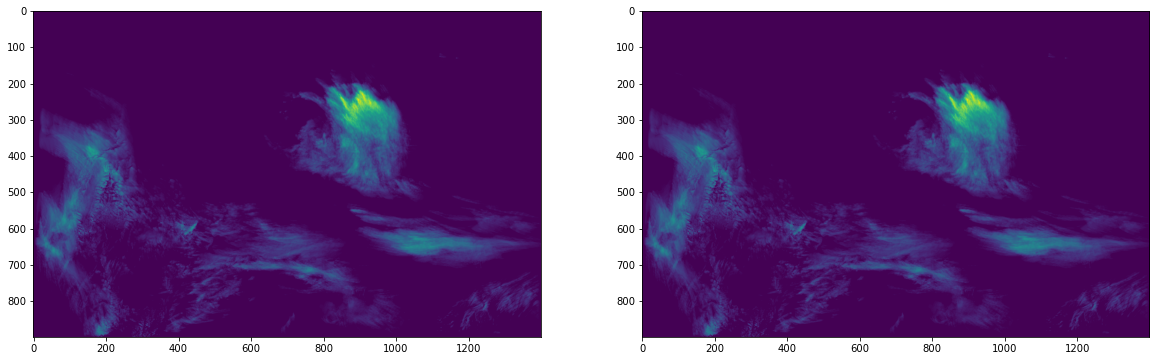

In [10]:
plt.rcParams['figure.figsize'] = 20, 20

ax = plt.subplot(1, 2, 1)

ax.imshow(numpy_manual)

ax1 = plt.subplot(1, 2, 2)

ax1.imshow(numpy_resample)

In [16]:
for day_date, day_info in ds.resample(Time='24H', base=12):
    
    print("Start of period", day_date)
    print("Hours in data", day_info.Time.values)

Start of period 1990-09-30T12:00:00.000000000
Hours in data ['1990-10-01T00:00:00.000000000' '1990-10-01T01:00:00.000000000'
 '1990-10-01T02:00:00.000000000' '1990-10-01T03:00:00.000000000'
 '1990-10-01T04:00:00.000000000' '1990-10-01T05:00:00.000000000'
 '1990-10-01T06:00:00.000000000' '1990-10-01T07:00:00.000000000'
 '1990-10-01T08:00:00.000000000' '1990-10-01T09:00:00.000000000'
 '1990-10-01T10:00:00.000000000' '1990-10-01T11:00:00.000000000']
Start of period 1990-10-01T12:00:00.000000000
Hours in data ['1990-10-01T12:00:00.000000000' '1990-10-01T13:00:00.000000000'
 '1990-10-01T14:00:00.000000000' '1990-10-01T15:00:00.000000000'
 '1990-10-01T16:00:00.000000000' '1990-10-01T17:00:00.000000000'
 '1990-10-01T18:00:00.000000000' '1990-10-01T19:00:00.000000000'
 '1990-10-01T20:00:00.000000000' '1990-10-01T21:00:00.000000000'
 '1990-10-01T22:00:00.000000000' '1990-10-01T23:00:00.000000000'
 '1990-10-02T00:00:00.000000000' '1990-10-02T01:00:00.000000000'
 '1990-10-02T02:00:00.000000000' '

In [17]:
ds.HAIL_MAX2D

<xarray.DataArray 'HAIL_MAX2D' (Time: 131007, south_north: 899, west_east: 1399)>
dask.array<concatenate, shape=(131007, 899, 1399), dtype=float32, chunksize=(24, 899, 1399), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) datetime64[ns] 1990-10-01 1990-10-01T01:00:00 ... 2005-09-30
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  MAX HAIL DIAMETER ENTIRE COLUMN
    units:        m
    stagger:      
    coordinates:  XLONG XLAT XTIME

In [18]:
from metpy.units import units

svr_inch = 1 * units.inches

svr_meters = svr_inch.to('m')

svr_hail = 1*(ds >= svr_meters.magnitude)

svr_hail

<xarray.Dataset>
Dimensions:     (Time: 131007, south_north: 899, west_east: 1399)
Coordinates:
  * Time        (Time) datetime64[ns] 1990-10-01 ... 2005-09-30
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (Time, south_north, west_east) int64 dask.array<chunksize=(24, 899, 1399), meta=np.ndarray>
Attributes: (12/93)
    TITLE:                            OUTPUT FROM WRF V4.1.2 MODEL
    START_DATE:                      1990-10-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        1400
    SOUTH-NORTH_GRID_DIMENSION:      900
    BOTTOM-TOP_GRID_DIMENSION:       51
    DX:                              3750.0
    ...                              ...
    file_count:                      24
    first_file:                      /gpfs/csfs1/univ/unid0001/historical/199...
    last_file:                       /gpfs/csfs1/univ/unid0001/historical/199...
    first_time:                      1990-10-01T00:00:00.000000000
    last_time:                       1990-10-01T23:00:00.000000000
    sim:                             historical

In [19]:
a = svr_hail.sum(('south_north', 'west_east'))

a.sortby('HAIL_MAX2D')

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing with an out-of-order index is generating 24 times more chunks
  return self.array[key]


<xarray.Dataset>
Dimensions:     (Time: 131007)
Coordinates:
  * Time        (Time) datetime64[ns] 1990-10-01 ... 2003-11-24T18:00:00
Data variables:
    HAIL_MAX2D  (Time) int64 dask.array<chunksize=(2,), meta=np.ndarray>

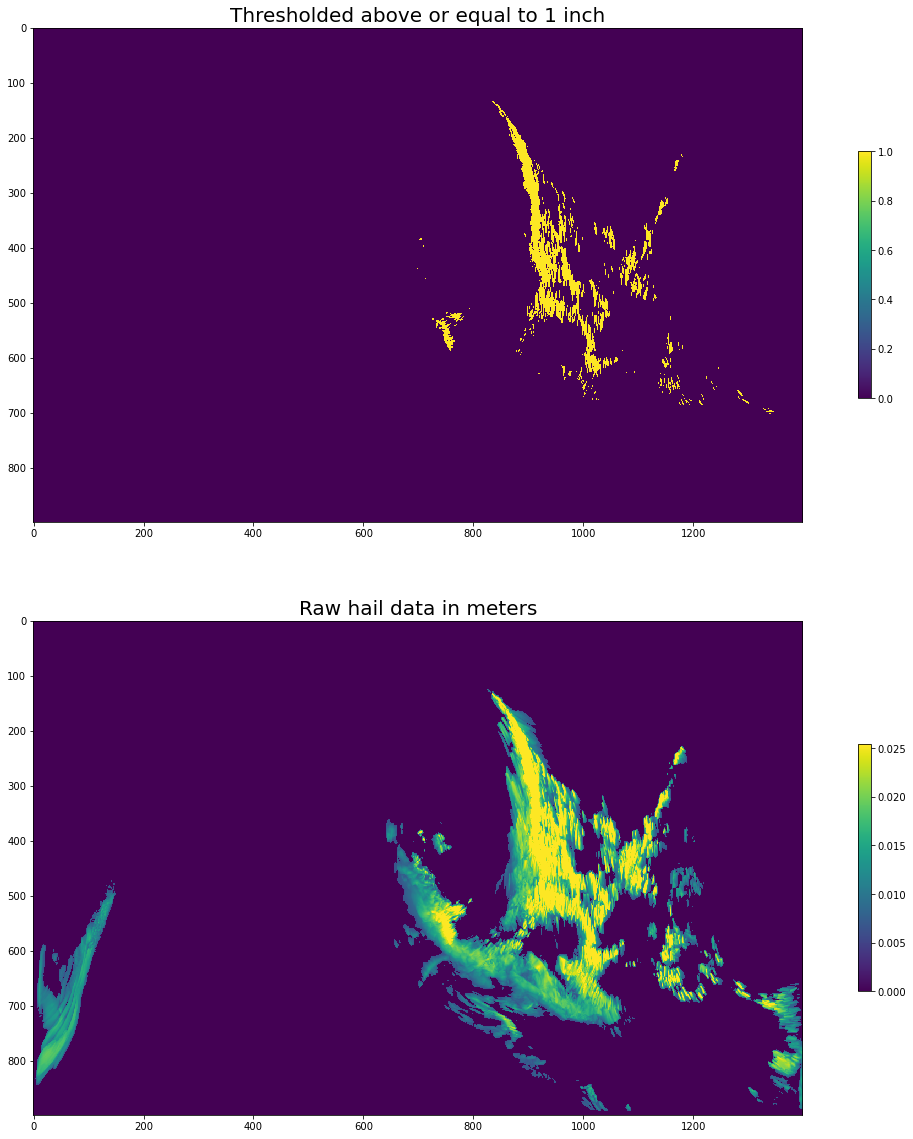

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 20, 20

ax = plt.subplot(2, 1, 1)
ax.set_title("Thresholded above or equal to 1 inch", fontsize = 20)
mmp = ax.imshow(svr_hail.sel(Time='2003-11-24T18:00:00')['HAIL_MAX2D'].values, interpolation='None')
plt.colorbar(mmp, ax=ax, shrink=0.5)

ax1 = plt.subplot(2, 1, 2)
ax1.set_title("Raw hail data in meters", fontsize = 20)
mmp = ax1.imshow(ds.sel(Time='2003-11-24T18:00:00')['HAIL_MAX2D'].values, vmin=0, vmax=svr_meters.magnitude, interpolation='None')
plt.colorbar(mmp, ax=ax1, shrink=0.5)